<a href="https://colab.research.google.com/github/imenebak/CSRNet-pytorch/blob/master/CSRNet_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple density map**

In [1]:
import os 
os.chdir("/home/r8/Graduation_project_zl/CSRNet-pytorch-master/")# 改变当前工作目录到path下

In [2]:
# !git clone https://github.com/imenebak/CSRNet-pytorch.git

In [ ]:
# !unzip "/content/drive/My Drive/VisdroneCrowdCounting/train_test_VisdroneFastDensity.zip" -d "/content/"

Archive:  /content/drive/My Drive/VisdroneCrowdCounting/train_test_VisdroneFastDensity.zip
   creating: /content/train/
   creating: /content/train/sequences/
  inflating: /content/train/sequences/0001300023.jpg  
  inflating: /content/train/sequences/0001300010.jpg  
  inflating: /content/train/sequences/0001400004.jpg  
  inflating: /content/train/sequences/0001400018.jpg  
  inflating: /content/train/sequences/0006600022.jpg  
  inflating: /content/train/sequences/0000700015.jpg  
  inflating: /content/train/sequences/0001400022.jpg  
  inflating: /content/train/sequences/0006700026.jpg  
  inflating: /content/train/sequences/0001900027.jpg  
  inflating: /content/train/sequences/0001900008.jpg  
  inflating: /content/train/sequences/0010200002.jpg  
  inflating: /content/train/sequences/0002100027.jpg  
  inflating: /content/train/sequences/0010200023.jpg  
  inflating: /content/train/sequences/0011000004.jpg  
  inflating: /content/train/sequences/0009900011.jpg  
  inflating: /co

In [2]:
import os
os.chdir("/home/r8/Graduation_project_zl/CSRNet-pytorch-master/")

In [3]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
from tqdm import tqdm
%matplotlib inline

In [4]:
root = r"/home/r8/Graduation_project_zl/CSRNet-pytorch-master"

In [6]:
train = root + '/train/sequences'
print(train)
test = root + '/test/sequences'
path_sets = [train,test]

/home/r8/Graduation_project_zl/CSRNet-pytorch-master/train/sequences


In [7]:
train

'/home/r8/Graduation_project_zl/CSRNet-pytorch-master/train/sequences'

In [8]:
import json, glob
img_paths = []
path=path_sets[0]
count =0 
for img_path in glob.glob(os.path.join(path, '*.jpg')):# 将会匹配给定路径下的所有pattern，并以列表形式返回
#   if count < 20:
    img_paths.append(img_path)
#   count += 1
with open("train_Vis2.json","w") as mj:
  json.dump(img_paths, mj)
img_paths

['/home/r8/Graduation_project_zl/CSRNet-pytorch-master/train/sequences/0010200030.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/train/sequences/0006400004.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/train/sequences/0005100025.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/train/sequences/0006600024.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/train/sequences/0004000024.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/train/sequences/0008900026.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/train/sequences/0009600004.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/train/sequences/0003600024.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/train/sequences/0000400018.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/train/sequences/0000400019.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/train/sequences/0010900024.jpg',
 '/home/r8/Graduation_project_zl

In [9]:
img_paths = []
path=path_sets[1]
count =0 
for img_path in glob.glob(os.path.join(path, '*.jpg')):
#   if count < 8:
    img_paths.append(img_path)
#   count += 1
with open("test_Vis2.json","w") as mj:
  json.dump(img_paths, mj)# 将json信息写进文件
img_paths

['/home/r8/Graduation_project_zl/CSRNet-pytorch-master/test/sequences/0008700023.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/test/sequences/0008600021.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/test/sequences/0010600006.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/test/sequences/0009200010.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/test/sequences/0005800012.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/test/sequences/0001400029.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/test/sequences/0010200015.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/test/sequences/0005500006.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/test/sequences/0009800001.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/test/sequences/0002000007.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/test/sequences/0008900007.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pyt

In [ ]:
!python train.py train_Vis2.json test_Vis2.json 0 0

/home/r8/anaconda3/envs/UAVCrowd/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
epoch 0, processed 0 samples, lr 0.0000010000
/home/r8/Graduation_project_zl/CSRNet-pytorch-master/image.py:12: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  gt_file = h5py.File(gt_path)
Epoch: [0][0/1772]	Time 1.564 (1.564)	Data 0.051 (0.051)	MseLoss 3.3069 (3.3069)	
Epoch: [0][100/1772]	Time 0.114 (0.128)	Data 0.029 (0.031)	MseLoss 0.1012 (8.0593)	
Epoch: [0][200/1772]	Time 0.116 (0.121)	Data 0.029 (0.031)	MseLoss 22.3292 (9.8269)	
Epoch: [0][300/1772]	Time 0.115 

Epoch: [4][1000/1772]	Time 0.122 (0.123)	Data 0.032 (0.031)	MseLoss 0.3903 (5.5825)	
Epoch: [4][1100/1772]	Time 0.124 (0.124)	Data 0.030 (0.031)	MseLoss 6.6489 (5.5072)	
Epoch: [4][1200/1772]	Time 0.124 (0.124)	Data 0.033 (0.031)	MseLoss 2.7208 (5.4857)	
Epoch: [4][1300/1772]	Time 0.127 (0.124)	Data 0.028 (0.031)	MseLoss 8.5534 (5.4402)	
Epoch: [4][1400/1772]	Time 0.123 (0.124)	Data 0.031 (0.031)	MseLoss 3.9723 (5.4070)	
Epoch: [4][1500/1772]	Time 0.125 (0.124)	Data 0.032 (0.031)	MseLoss 0.0620 (5.3557)	
Epoch: [4][1600/1772]	Time 0.124 (0.124)	Data 0.029 (0.031)	MseLoss 2.6400 (5.4448)	
Epoch: [4][1700/1772]	Time 0.121 (0.124)	Data 0.032 (0.031)	MseLoss 0.3309 (5.3298)	
begin test
 * MAE 30.129, MSE 1328.681
 * best MAE 11.560,best MSE 242.696 
Training complete in 4m 2s
epoch 5, processed 8860 samples, lr 0.0000010000
Epoch: [5][0/1772]	Time 0.110 (0.110)	Data 0.065 (0.065)	MseLoss 54.2264 (54.2264)	
Epoch: [5][100/1772]	Time 0.121 (0.122)	Data 0.030 (0.030)	MseLoss 0.4148 (6.3319)	


Epoch: [9][800/1772]	Time 0.122 (0.124)	Data 0.030 (0.031)	MseLoss 0.0381 (4.5224)	
Epoch: [9][900/1772]	Time 0.126 (0.124)	Data 0.031 (0.031)	MseLoss 1.1387 (4.5101)	
Epoch: [9][1000/1772]	Time 0.124 (0.124)	Data 0.030 (0.031)	MseLoss 4.1501 (4.5727)	
Epoch: [9][1100/1772]	Time 0.126 (0.124)	Data 0.032 (0.031)	MseLoss 9.6900 (4.5399)	
Epoch: [9][1200/1772]	Time 0.124 (0.124)	Data 0.031 (0.031)	MseLoss 8.2603 (4.5950)	
Epoch: [9][1300/1772]	Time 0.126 (0.124)	Data 0.031 (0.032)	MseLoss 1.4906 (4.5887)	
Epoch: [9][1400/1772]	Time 0.122 (0.124)	Data 0.031 (0.032)	MseLoss 26.8145 (4.7401)	
Epoch: [9][1500/1772]	Time 0.122 (0.124)	Data 0.032 (0.031)	MseLoss 23.4111 (4.8064)	
Epoch: [9][1600/1772]	Time 0.125 (0.124)	Data 0.030 (0.032)	MseLoss 14.0340 (4.7782)	
Epoch: [9][1700/1772]	Time 0.125 (0.124)	Data 0.030 (0.032)	MseLoss 0.9641 (4.8335)	
begin test
 * MAE 7.527, MSE 94.922
 * best MAE 7.527,best MSE 94.922 
Training complete in 4m 4s
epoch 10, processed 17720 samples, lr 0.0000010000


Epoch: [14][600/1772]	Time 0.122 (0.124)	Data 0.031 (0.031)	MseLoss 0.0592 (4.3232)	
Epoch: [14][700/1772]	Time 0.124 (0.124)	Data 0.038 (0.031)	MseLoss 0.0135 (4.2984)	
Epoch: [14][800/1772]	Time 0.126 (0.124)	Data 0.030 (0.031)	MseLoss 7.8599 (4.2360)	
Epoch: [14][900/1772]	Time 0.125 (0.124)	Data 0.031 (0.031)	MseLoss 0.3825 (4.2040)	
Epoch: [14][1000/1772]	Time 0.126 (0.124)	Data 0.030 (0.031)	MseLoss 1.8889 (4.2262)	
Epoch: [14][1100/1772]	Time 0.124 (0.124)	Data 0.030 (0.031)	MseLoss 5.3850 (4.3332)	
Epoch: [14][1200/1772]	Time 0.124 (0.124)	Data 0.038 (0.031)	MseLoss 27.1484 (4.3532)	
Epoch: [14][1300/1772]	Time 0.125 (0.124)	Data 0.029 (0.031)	MseLoss 0.2987 (4.3128)	
Epoch: [14][1400/1772]	Time 0.125 (0.124)	Data 0.031 (0.032)	MseLoss 3.2415 (4.5006)	
Epoch: [14][1500/1772]	Time 0.125 (0.124)	Data 0.034 (0.032)	MseLoss 1.5005 (4.4816)	
Epoch: [14][1600/1772]	Time 0.124 (0.124)	Data 0.031 (0.032)	MseLoss 0.0138 (4.4927)	
Epoch: [14][1700/1772]	Time 0.126 (0.124)	Data 0.031 (0.0

Epoch: [19][400/1772]	Time 0.130 (0.124)	Data 0.037 (0.032)	MseLoss 1.0025 (4.1250)	
Epoch: [19][500/1772]	Time 0.123 (0.124)	Data 0.037 (0.032)	MseLoss 0.9441 (4.0743)	
Epoch: [19][600/1772]	Time 0.120 (0.124)	Data 0.030 (0.032)	MseLoss 3.2831 (4.0695)	
Epoch: [19][700/1772]	Time 0.127 (0.124)	Data 0.035 (0.032)	MseLoss 2.7063 (4.0872)	
Epoch: [19][800/1772]	Time 0.127 (0.124)	Data 0.032 (0.032)	MseLoss 4.1016 (3.9757)	
Epoch: [19][900/1772]	Time 0.123 (0.124)	Data 0.031 (0.032)	MseLoss 11.6892 (3.9997)	
Epoch: [19][1000/1772]	Time 0.124 (0.124)	Data 0.030 (0.032)	MseLoss 14.1788 (4.1407)	
Epoch: [19][1100/1772]	Time 0.125 (0.124)	Data 0.034 (0.032)	MseLoss 1.7778 (4.2451)	
Epoch: [19][1200/1772]	Time 0.128 (0.124)	Data 0.030 (0.032)	MseLoss 0.1866 (4.3176)	
Epoch: [19][1300/1772]	Time 0.123 (0.124)	Data 0.032 (0.032)	MseLoss 2.6878 (4.2732)	
Epoch: [19][1400/1772]	Time 0.124 (0.124)	Data 0.034 (0.032)	MseLoss 14.0634 (4.2701)	
Epoch: [19][1500/1772]	Time 0.128 (0.124)	Data 0.029 (0.0

Epoch: [24][200/1772]	Time 0.127 (0.123)	Data 0.029 (0.032)	MseLoss 0.0553 (5.0167)	
Epoch: [24][300/1772]	Time 0.124 (0.124)	Data 0.030 (0.032)	MseLoss 4.7719 (4.6474)	
Epoch: [24][400/1772]	Time 0.125 (0.124)	Data 0.034 (0.032)	MseLoss 5.2557 (4.7345)	
Epoch: [24][500/1772]	Time 0.130 (0.124)	Data 0.031 (0.032)	MseLoss 9.0342 (4.6181)	
Epoch: [24][600/1772]	Time 0.124 (0.124)	Data 0.029 (0.032)	MseLoss 1.8768 (4.5346)	
Epoch: [24][700/1772]	Time 0.130 (0.124)	Data 0.032 (0.032)	MseLoss 10.8210 (4.5651)	
Epoch: [24][800/1772]	Time 0.125 (0.124)	Data 0.034 (0.032)	MseLoss 0.7870 (4.5451)	
Epoch: [24][900/1772]	Time 0.131 (0.124)	Data 0.030 (0.032)	MseLoss 10.2476 (4.4398)	
Epoch: [24][1000/1772]	Time 0.128 (0.124)	Data 0.031 (0.032)	MseLoss 2.8504 (4.3867)	
Epoch: [24][1100/1772]	Time 0.126 (0.125)	Data 0.030 (0.032)	MseLoss 1.4674 (4.3809)	
Epoch: [24][1200/1772]	Time 0.126 (0.125)	Data 0.030 (0.032)	MseLoss 0.0559 (4.3176)	
Epoch: [24][1300/1772]	Time 0.123 (0.125)	Data 0.030 (0.032)

Epoch: [29][0/1772]	Time 0.122 (0.122)	Data 0.060 (0.060)	MseLoss 1.0444 (1.0444)	
Epoch: [29][100/1772]	Time 0.122 (0.122)	Data 0.029 (0.032)	MseLoss 3.7314 (3.0295)	
Epoch: [29][200/1772]	Time 0.127 (0.123)	Data 0.032 (0.032)	MseLoss 0.0982 (3.4566)	
Epoch: [29][300/1772]	Time 0.123 (0.124)	Data 0.032 (0.032)	MseLoss 2.3037 (3.5661)	
Epoch: [29][400/1772]	Time 0.122 (0.124)	Data 0.032 (0.032)	MseLoss 2.1868 (3.5710)	
Epoch: [29][500/1772]	Time 0.121 (0.124)	Data 0.030 (0.032)	MseLoss 3.8523 (3.5238)	
Epoch: [29][600/1772]	Time 0.124 (0.124)	Data 0.031 (0.032)	MseLoss 0.1970 (3.9693)	
Epoch: [29][700/1772]	Time 0.122 (0.124)	Data 0.032 (0.032)	MseLoss 0.4118 (4.0361)	
Epoch: [29][800/1772]	Time 0.127 (0.124)	Data 0.031 (0.032)	MseLoss 22.3086 (3.9714)	
Epoch: [29][900/1772]	Time 0.128 (0.125)	Data 0.031 (0.032)	MseLoss 0.7268 (3.9892)	
Epoch: [29][1000/1772]	Time 0.124 (0.125)	Data 0.031 (0.032)	MseLoss 0.0319 (3.9631)	
Epoch: [29][1100/1772]	Time 0.124 (0.125)	Data 0.029 (0.032)	MseL

Epoch: [33][1700/1772]	Time 0.124 (0.125)	Data 0.036 (0.032)	MseLoss 2.5162 (3.8127)	
begin test
 * MAE 5.526, MSE 47.288
 * best MAE 5.018,best MSE 47.288 
Training complete in 4m 3s
epoch 34, processed 60248 samples, lr 0.0000010000
Epoch: [34][0/1772]	Time 0.111 (0.111)	Data 0.060 (0.060)	MseLoss 0.2510 (0.2510)	
Epoch: [34][100/1772]	Time 0.124 (0.123)	Data 0.040 (0.032)	MseLoss 3.8069 (3.0028)	
Epoch: [34][200/1772]	Time 0.123 (0.123)	Data 0.030 (0.033)	MseLoss 1.7729 (3.4829)	
Epoch: [34][300/1772]	Time 0.123 (0.123)	Data 0.032 (0.032)	MseLoss 2.7930 (3.5271)	
Epoch: [34][400/1772]	Time 0.120 (0.124)	Data 0.028 (0.032)	MseLoss 7.5901 (3.6776)	
Epoch: [34][500/1772]	Time 0.121 (0.124)	Data 0.031 (0.032)	MseLoss 4.2250 (3.6673)	
Epoch: [34][600/1772]	Time 0.122 (0.124)	Data 0.032 (0.032)	MseLoss 0.8853 (3.6360)	
Epoch: [34][700/1772]	Time 0.125 (0.124)	Data 0.035 (0.032)	MseLoss 2.6980 (3.6146)	
Epoch: [34][800/1772]	Time 0.124 (0.124)	Data 0.033 (0.032)	MseLoss 3.0593 (3.4977)	
Ep

Epoch: [38][1500/1772]	Time 0.120 (0.124)	Data 0.031 (0.031)	MseLoss 0.4305 (3.7337)	
Epoch: [38][1600/1772]	Time 0.125 (0.125)	Data 0.033 (0.031)	MseLoss 2.1455 (3.7186)	
Epoch: [38][1700/1772]	Time 0.128 (0.125)	Data 0.031 (0.031)	MseLoss 3.6986 (3.6897)	
begin test
 * MAE 5.759, MSE 60.013
 * best MAE 4.551,best MSE 37.131 
Training complete in 4m 3s
epoch 39, processed 69108 samples, lr 0.0000010000
Epoch: [39][0/1772]	Time 0.111 (0.111)	Data 0.065 (0.065)	MseLoss 0.0210 (0.0210)	
Epoch: [39][100/1772]	Time 0.121 (0.122)	Data 0.031 (0.032)	MseLoss 1.7765 (3.3963)	
Epoch: [39][200/1772]	Time 0.125 (0.123)	Data 0.031 (0.032)	MseLoss 4.3983 (3.1180)	
Epoch: [39][300/1772]	Time 0.122 (0.123)	Data 0.029 (0.031)	MseLoss 0.7518 (3.5063)	
Epoch: [39][400/1772]	Time 0.128 (0.124)	Data 0.030 (0.032)	MseLoss 2.9443 (3.6343)	
Epoch: [39][500/1772]	Time 0.126 (0.124)	Data 0.031 (0.031)	MseLoss 6.5198 (3.6210)	
Epoch: [39][600/1772]	Time 0.128 (0.124)	Data 0.030 (0.032)	MseLoss 0.6494 (3.6028)	


Epoch: [43][1300/1772]	Time 0.125 (0.125)	Data 0.031 (0.032)	MseLoss 5.3801 (3.6988)	
Epoch: [43][1400/1772]	Time 0.125 (0.125)	Data 0.031 (0.032)	MseLoss 6.5499 (3.7587)	
Epoch: [43][1500/1772]	Time 0.123 (0.125)	Data 0.030 (0.032)	MseLoss 0.0122 (3.8034)	
Epoch: [43][1600/1772]	Time 0.127 (0.125)	Data 0.029 (0.032)	MseLoss 3.0404 (3.7797)	
Epoch: [43][1700/1772]	Time 0.125 (0.125)	Data 0.031 (0.032)	MseLoss 1.3248 (3.7454)	
begin test
 * MAE 7.842, MSE 98.788
 * best MAE 4.551,best MSE 37.131 
Training complete in 4m 4s
epoch 44, processed 77968 samples, lr 0.0000010000
Epoch: [44][0/1772]	Time 0.113 (0.113)	Data 0.067 (0.067)	MseLoss 12.1307 (12.1307)	
Epoch: [44][100/1772]	Time 0.126 (0.122)	Data 0.031 (0.033)	MseLoss 4.6313 (3.5177)	
Epoch: [44][200/1772]	Time 0.120 (0.123)	Data 0.035 (0.033)	MseLoss 37.7334 (3.2392)	
Epoch: [44][300/1772]	Time 0.125 (0.123)	Data 0.030 (0.033)	MseLoss 0.2218 (3.3932)	
Epoch: [44][400/1772]	Time 0.124 (0.124)	Data 0.031 (0.032)	MseLoss 0.4187 (3.24

Epoch: [48][1100/1772]	Time 0.123 (0.125)	Data 0.035 (0.032)	MseLoss 0.1076 (3.8116)	
Epoch: [48][1200/1772]	Time 0.121 (0.125)	Data 0.031 (0.032)	MseLoss 0.1874 (3.6945)	
Epoch: [48][1300/1772]	Time 0.125 (0.125)	Data 0.028 (0.032)	MseLoss 9.5933 (3.6724)	
Epoch: [48][1400/1772]	Time 0.122 (0.125)	Data 0.032 (0.032)	MseLoss 0.8696 (3.6638)	
Epoch: [48][1500/1772]	Time 0.123 (0.125)	Data 0.028 (0.031)	MseLoss 4.1836 (3.6049)	
Epoch: [48][1600/1772]	Time 0.126 (0.125)	Data 0.029 (0.031)	MseLoss 0.1136 (3.7208)	
Epoch: [48][1700/1772]	Time 0.124 (0.125)	Data 0.031 (0.031)	MseLoss 5.4307 (3.6730)	
begin test
 * MAE 9.034, MSE 125.329
 * best MAE 4.307,best MSE 35.388 
Training complete in 4m 4s
epoch 49, processed 86828 samples, lr 0.0000010000
Epoch: [49][0/1772]	Time 0.118 (0.118)	Data 0.068 (0.068)	MseLoss 0.1427 (0.1427)	
Epoch: [49][100/1772]	Time 0.120 (0.123)	Data 0.029 (0.032)	MseLoss 0.9622 (3.7974)	
Epoch: [49][200/1772]	Time 0.127 (0.123)	Data 0.033 (0.032)	MseLoss 1.6184 (3.39

Epoch: [53][900/1772]	Time 0.127 (0.125)	Data 0.033 (0.031)	MseLoss 0.1897 (3.4006)	
Epoch: [53][1000/1772]	Time 0.126 (0.125)	Data 0.030 (0.031)	MseLoss 2.7799 (3.2999)	
Epoch: [53][1100/1772]	Time 0.122 (0.125)	Data 0.031 (0.031)	MseLoss 5.0743 (3.2542)	
Epoch: [53][1200/1772]	Time 0.124 (0.125)	Data 0.028 (0.031)	MseLoss 7.8546 (3.2086)	
Epoch: [53][1300/1772]	Time 0.124 (0.125)	Data 0.032 (0.031)	MseLoss 7.4937 (3.2871)	
Epoch: [53][1400/1772]	Time 0.128 (0.125)	Data 0.031 (0.031)	MseLoss 0.2671 (3.2604)	
Epoch: [53][1500/1772]	Time 0.127 (0.125)	Data 0.029 (0.031)	MseLoss 3.0463 (3.3648)	
Epoch: [53][1600/1772]	Time 0.126 (0.125)	Data 0.031 (0.031)	MseLoss 3.2872 (3.3324)	
Epoch: [53][1700/1772]	Time 0.126 (0.125)	Data 0.028 (0.031)	MseLoss 0.4682 (3.3082)	
begin test
 * MAE 6.114, MSE 70.779
 * best MAE 4.307,best MSE 35.388 
Training complete in 4m 4s
epoch 54, processed 95688 samples, lr 0.0000010000
Epoch: [54][0/1772]	Time 0.115 (0.115)	Data 0.065 (0.065)	MseLoss 2.1826 (2.18

Epoch: [58][700/1772]	Time 0.145 (0.131)	Data 0.038 (0.040)	MseLoss 0.8536 (3.3403)	
Epoch: [58][800/1772]	Time 0.141 (0.132)	Data 0.037 (0.039)	MseLoss 0.0892 (3.3122)	
Epoch: [58][900/1772]	Time 0.139 (0.133)	Data 0.035 (0.039)	MseLoss 0.0095 (3.3419)	
Epoch: [58][1000/1772]	Time 0.126 (0.133)	Data 0.032 (0.039)	MseLoss 3.2762 (3.3402)	
Epoch: [58][1100/1772]	Time 0.126 (0.133)	Data 0.039 (0.038)	MseLoss 2.4525 (3.2691)	
Epoch: [58][1200/1772]	Time 0.123 (0.132)	Data 0.029 (0.038)	MseLoss 0.1083 (3.2805)	
Epoch: [58][1300/1772]	Time 0.125 (0.132)	Data 0.030 (0.037)	MseLoss 7.1996 (3.2572)	
Epoch: [58][1400/1772]	Time 0.125 (0.132)	Data 0.031 (0.037)	MseLoss 12.6300 (3.2517)	
Epoch: [58][1500/1772]	Time 0.148 (0.131)	Data 0.034 (0.037)	MseLoss 7.0138 (3.2175)	
Epoch: [58][1600/1772]	Time 0.129 (0.131)	Data 0.029 (0.036)	MseLoss 7.5004 (3.2749)	
Epoch: [58][1700/1772]	Time 0.128 (0.131)	Data 0.032 (0.036)	MseLoss 2.2451 (3.2613)	
begin test
 * MAE 8.336, MSE 114.483
 * best MAE 4.307,b

In [10]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])
# 串联多个图片变换的操作
# 例如CenterCrop,RandomCrop,RandomHorizontalFlip,RandomVerticalFlip,RandomResizedCrop,Grayscale,RandomGrayscale,ColorJitter等
# ToTensor()将shape为(H, W, C)的nump.ndarray或img转为shape为(C, H, W)的tensor，其将每一个数值归一化到[0,1]
# 先将输入归一化到(0,1)，再使用公式"(x-mean)/std"，将每个元素分布到(-1,1)

In [ ]:
# !cp "/content/CSRNet-pytorch/0checkpoint.pth.tar" "/content/drive/My Drive/Resultats/CSRNET_PYTORCH/2020/fastDensity/sleep0checkpoint.pth.tar"

In [ ]:
# !cp "/content/CSRNet-pytorch/0model_best.pth.tar" "/content/drive/My Drive/Resultats/CSRNET_PYTORCH/2020/fastDensity/sleep0model_best.pth.tar"

In [11]:
train = root + '/train/sequences'
print(train)
test = root + '/test/sequences'
path_sets = [test]

/home/r8/Graduation_project_zl/CSRNet-pytorch-master/train/sequences


In [12]:
import json, glob
img_paths = []
path=path_sets[0]
count =0 
for img_path in glob.glob(os.path.join(path, '*.jpg')):
  if count < 2:
    img_paths.append(img_path)
  count += 1
img_paths

['/home/r8/Graduation_project_zl/CSRNet-pytorch-master/test/sequences/0008700023.jpg',
 '/home/r8/Graduation_project_zl/CSRNet-pytorch-master/test/sequences/0008600021.jpg']

In [13]:
model = CSRNet()

In [14]:
model = model.cuda()

In [15]:
checkpoint = torch.load('0model_best.pth.tar')

In [16]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [17]:
mae = 0
for i in tqdm(range(len(img_paths))):
    # 一个快速，可扩展的Python进度条，可以在 Python 长循环中添加一个进度提示信息，用户只需要封装任意的迭代器 tqdm(iterator)
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('sequences','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
print (mae/len(img_paths))

100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

4.4849090576171875


Predicted Count :  51


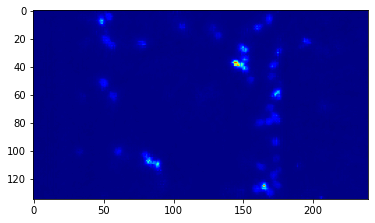

Original Count :  55


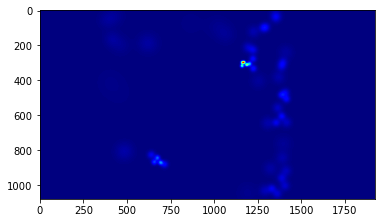

Original Image


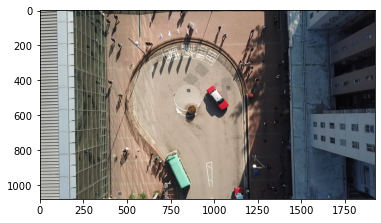

In [22]:
# 这段代码就先不怎么查找函数用法,先不注释.先把代码跑起来.就用之前已经在shanghaitech数据集得到的模型上跑
from matplotlib import cm as c
img = transform(Image.open('/home/r8/Graduation_project_zl/CSRNet-pytorch-master/test/sequences/0008700023.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('/home/r8/Graduation_project_zl/CSRNet-pytorch-master/test/sequences/0008700023.jpg'.replace("sequences", "ground_truth").replace('.jpg','.h5'), 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('/home/r8/Graduation_project_zl/CSRNet-pytorch-master/test/sequences/0008700023.jpg'))
plt.show()